In [108]:
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Loading the dataset

In [2]:
data = pd.read_csv("credit_risk_dataset.csv")
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [3]:
data['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [4]:
len(data.index)

32581

In [5]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Removing null values from the records

In [8]:
%matplotlib inline

/Users/abhishekshastry/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_int_rate'>

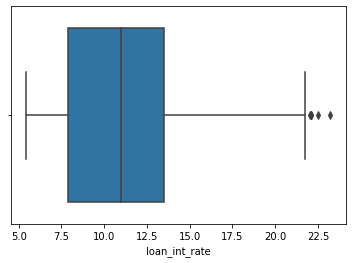

In [9]:
 sns.boxplot(data.loan_int_rate)

In [10]:
# pip install pyqt5

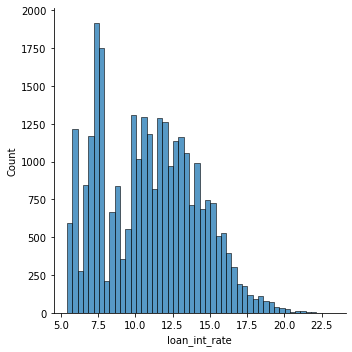

In [11]:
sns.displot(data['loan_int_rate'])

/Users/abhishekshastry/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_emp_length'>

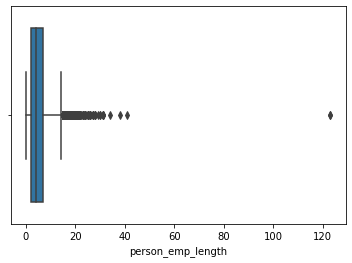

In [12]:
sns.boxplot(data['person_emp_length'])

<AxesSubplot:xlabel='person_emp_length', ylabel='Count'>

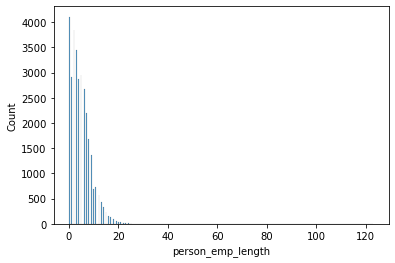

In [13]:
sns.histplot(data['person_emp_length'])

# As person_emp_length is skewed and the data is numeric it is ideal to use median to impute the missing values. 

In [14]:
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())

In [15]:
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].median())

In [16]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Generating profile report.

In [17]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# we see a couple of duplicate rows. Lets remove these and have a look.

In [18]:
#Removing the Duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.head() # looking at the dataset after transformation

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [19]:
len(data.index)

32416

In [20]:
#Transpose
data.describe().T

count          mean           std      min  \
person_age                  32416.0     27.747008      6.354100    20.00   
person_income               32416.0  66091.640826  62015.580269  4000.00   
person_emp_length           32416.0      4.768880      4.090411     0.00   
loan_amnt                   32416.0   9593.845632   6322.730241   500.00   
loan_int_rate               32416.0     11.014662      3.083050     5.42   
loan_status                 32416.0      0.218688      0.413363     0.00   
loan_percent_income         32416.0      0.170250      0.106812     0.00   
cb_person_cred_hist_length  32416.0      5.811297      4.059030     2.00   

                                 25%       50%       75%         max  
person_age                     23.00     26.00     30.00      144.00  
person_income               38542.00  55000.00  79218.00  6000000.00  
person_emp_length               2.00      4.00      7.00      123.00  
loan_amnt                    5000.00   8000.00  12250.00    35000.00  
loan_int_rate                   8.49     10.99     13.11       23.22  
loan_status                     0.00      0.00      0.00        1.00  
loan_percent_income             0.09      0.15      0.23        0.83  
cb_person_cred_hist_length      3.00      4.00      8.00       30.00

# Visualization Histogram

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_status'}>],
       [<AxesSubplot:title={'center':'loan_percent_income'}>,
        <AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>]], dtype=object)

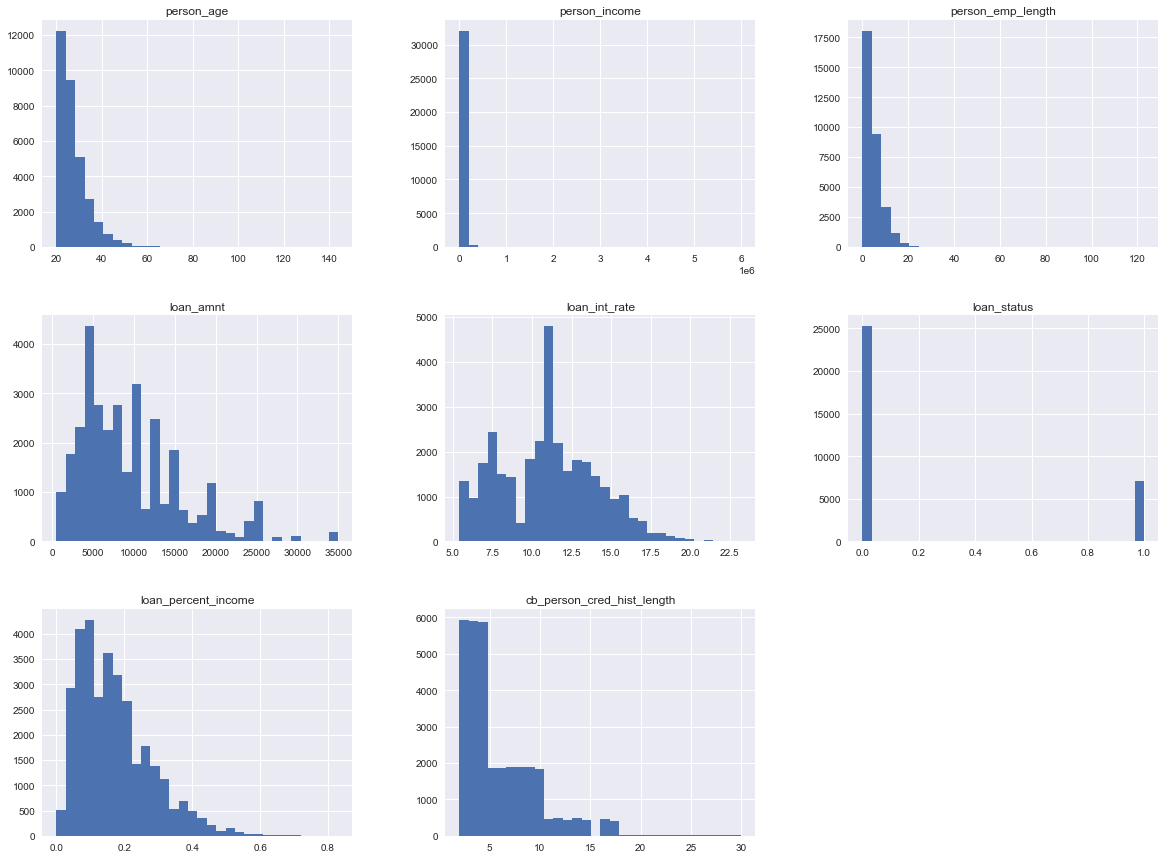

In [21]:
# Libraries and configurations for figure plotting
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
data.hist(bins=30, figsize=(20,15)) # plotting the histogram

In [22]:
if 0 in data['person_income'].values :
    print('yes')
else:
    print('no')

no


In [23]:
if 0 in data['loan_amnt'].values :
    print('yes')
else:
    print('no')

no


# no 0 values are present in income and loan 

# Removing the redundant data 

person_age
person_income
person_home_ownership
person_emp_length
loan_intent
loan_grade
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_default_on_file
cb_person_cred_hist_length


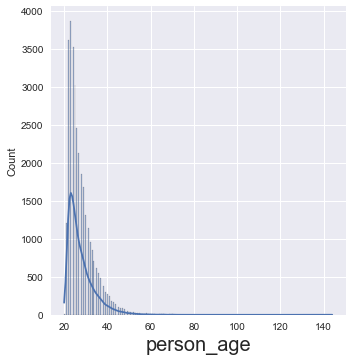

In [24]:
for column in data:
    print(column)
sns.displot(data.person_age,kde=True)
plt.xlabel('person_age' ,fontsize=20)
plt.show()

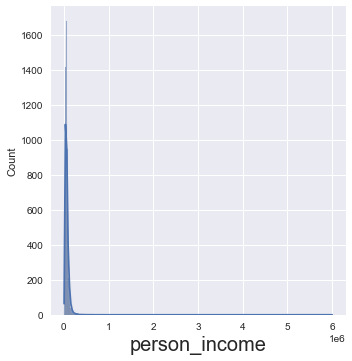

In [25]:
sns.displot(data.person_income,kde=True)
plt.xlabel('person_income' ,fontsize=20)
plt.show()

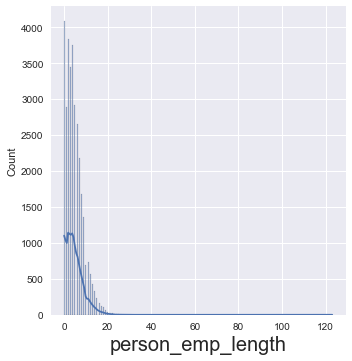

In [26]:
sns.displot(data.person_emp_length,kde=True)
plt.xlabel('person_emp_length' ,fontsize=20)
plt.show()

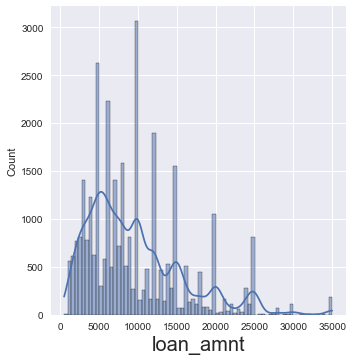

In [27]:
sns.displot(data.loan_amnt,kde=True)
plt.xlabel('loan_amnt' ,fontsize=20)
plt.show()

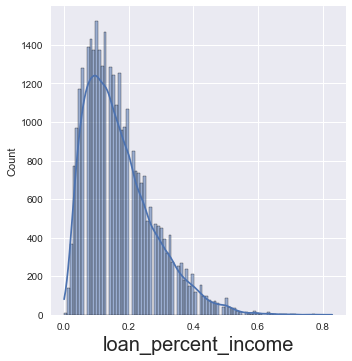

In [28]:
sns.displot(data.loan_percent_income,kde=True)
plt.xlabel('loan_percent_income' ,fontsize=20)
plt.show()

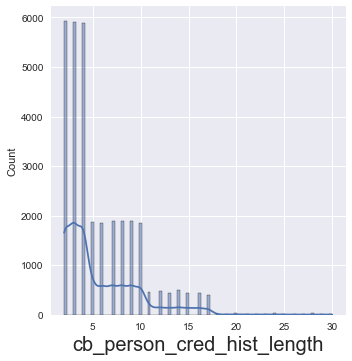

In [29]:
sns.displot(data.cb_person_cred_hist_length,kde=True)
plt.xlabel('cb_person_cred_hist_length' ,fontsize=20)
plt.show()

In [30]:
# person age, income, emp length has positive skewness.

In [31]:
data = data[data['person_age']<=80]
data = data[data['person_emp_length']<=80]
data = data[data['person_income']<=5e6]

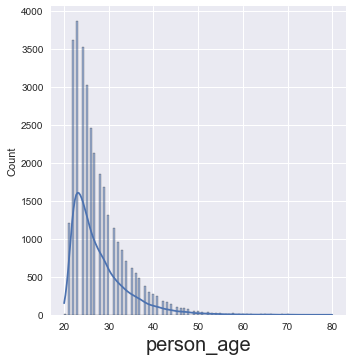

In [32]:
sns.displot(data.person_age,kde=True)
plt.xlabel('person_age' ,fontsize=20)
plt.show()

In [33]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32407.000000   3.240700e+04       32407.000000  32407.000000   
mean      27.726973   6.589468e+04           4.761626   9592.569507   
std        6.191831   5.251873e+04           3.983796   6321.056427   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12250.000000   
max       80.000000   2.039784e+06          41.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32407.000000  32407.000000         32407.000000   
mean       11.014621      0.218718             0.170247   
std         3.083138      0.413383             0.106786   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.110000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32407.000000  
mean                     5.809979  
std                      4.055058  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

# Visualization HeatMap

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

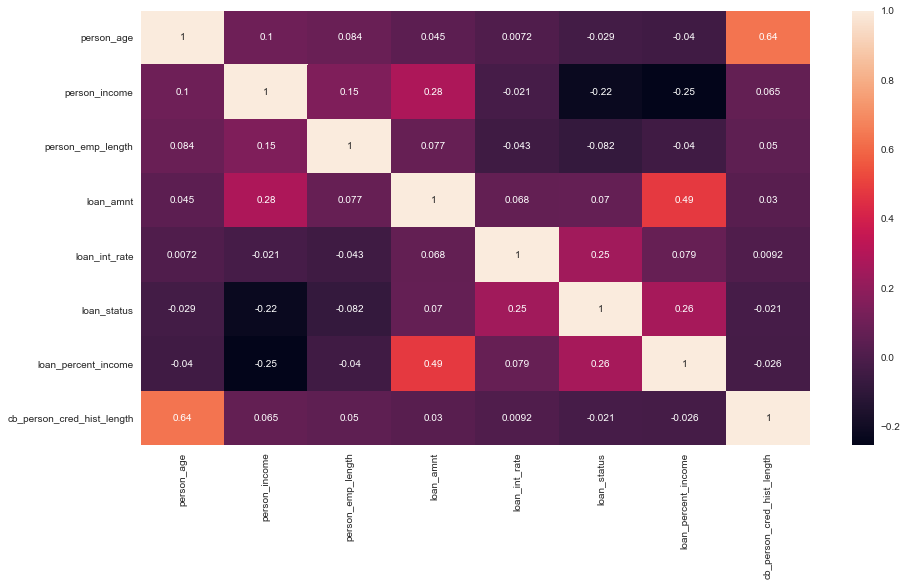

In [36]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

# we can conclude from the above heat map that as persons age increases his credit history is also long which is evident from the value of 0.63

# converting categorial into numericals for model to process

# The loan grade will be used a lable encoder as A>B>C..

# One hot encoding will give weightage equal for all the values.

In [38]:
# label_encoder object knows how to understand word labels. 
# Encode labels in column 'loan_grade'. 
data['loan_grade']= label_encoder.fit_transform(data['loan_grade']) 
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   EDUCATION           1       1000          11.14            0   
2     MEDICAL           2       5500          12.87            1   
3     MEDICAL           2      35000          15.23            1   
4     MEDICAL           2      35000          14.27            1   
5     VENTURE           0       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2

In [39]:
data['loan_grade'].unique()

array([1, 2, 0, 3, 4, 5, 6])

# using one hot encoder on person_home_ownership, cb_person_default_on_file, loan intent as they dont hold any rank 

In [40]:
#bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
dumm_df = pd.DataFrame(data['person_home_ownership'], columns=['person_home_ownership'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(dumm_df, columns=["person_home_ownership"] )
# merge with main df bridge_df on key values
data = data.join(dum_df)
data

person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
1            EDUCATION           1       1000          11.14            0   
2              MEDICAL           2       5500          12.87            1   
3              MEDICAL           2      35000          15.23            1   
4              MEDICAL           2      35000          14.27            1   
5              VENTURE           0       2500           7.14            1   
...                ...         ...        ...            ...          ...   
32576         PERSONAL           2       5800          13.16            0   
32577         PERSONAL           0      17625           7.49            0   
32578  HOMEIMPROVEMENT           1      35000          10.99            1   
32579         PERSONAL           1      15000          11.48            0   
32580          MEDICAL           1       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
5                     0.25                         N   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  person_home_ownership_MORTGAGE  \
1                               2                               0   
2                               3                               1   
3                               2                               0   
4                               4                               0   
5                               2                               0   
...                           ...                             ...   
32576                          30                               1   
32577                          19                               1   
32578                          28                               0   
32579                          26                               1   
32580                          30                               0   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
1                                0                          1   
2                                0                          0   
3                                0                          0   
4                                0                          0   
5                                0                          1   
...                            ...                        ...   
32576                            0                          0   
32577                            0                          0   
32578                            0                          0   
32579

In [41]:
dummy_df=pd.DataFrame(data['cb_person_default_on_file'],columns=['cb_person_default_on_file'])
df=pd.get_dummies(dummy_df,columns=['cb_person_default_on_file'])
data=data.join(df)
data

person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
1            EDUCATION           1       1000          11.14            0   
2              MEDICAL           2       5500          12.87            1   
3              MEDICAL           2      35000          15.23            1   
4              MEDICAL           2      35000          14.27            1   
5              VENTURE           0       2500           7.14            1   
...                ...         ...        ...            ...          ...   
32576         PERSONAL           2       5800          13.16            0   
32577         PERSONAL           0      17625           7.49            0   
32578  HOMEIMPROVEMENT           1      35000          10.99            1   
32579         PERSONAL           1      15000          11.48            0   
32580          MEDICAL           1       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
5                     0.25                         N   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  person_home_ownership_MORTGAGE  \
1                               2                               0   
2                               3                               1   
3                               2                               0   
4                               4                               0   
5                               2                               0   
...                           ...                             ...   
32576                          30                               1   
32577                          19                               1   
32578                          28                               0   
32579                          26                               1   
32580                          30                               0   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
1                                0                          1   
2                                0                          0   
3                                0                          0   
4                                0                          0   
5                                0                          1   
...                            ...                        ...   
32576                            0                          0   
32577                            0                          0   
32578                            0                          0   
32579

In [42]:
data.drop('person_home_ownership',inplace=True,axis=1)

In [43]:
data.drop('cb_person_default_on_file',inplace=True,axis=1)

In [44]:
data

person_age  person_income  person_emp_length      loan_intent  \
1              21           9600                5.0        EDUCATION   
2              25           9600                1.0          MEDICAL   
3              23          65500                4.0          MEDICAL   
4              24          54400                8.0          MEDICAL   
5              21           9900                2.0          VENTURE   
...           ...            ...                ...              ...   
32576          57          53000                1.0         PERSONAL   
32577          54         120000                4.0         PERSONAL   
32578          65          76000                3.0  HOMEIMPROVEMENT   
32579          56         150000                5.0         PERSONAL   
32580          66          42000                2.0          MEDICAL   

       loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
1               1       1000          11.14            0                 0.10   
2               2       5500          12.87            1                 0.57   
3               2      35000          15.23            1                 0.53   
4               2      35000          14.27            1                 0.55   
5               0       2500           7.14            1                 0.25   
...           ...        ...            ...          ...                  ...   
32576           2       5800          13.16            0                 0.11   
32577           0      17625           7.49            0                 0.15   
32578           1      35000          10.99            1                 0.46   
32579           1      15000          11.48            0                 0.10   
32580           1       6475           9.99            0                 0.15   

       cb_person_cred_hist_length  person_home_ownership_MORTGAGE  \
1                               2                               0   
2                               3                               1   
3                               2                               0   
4                               4                               0   
5                               2                               0   
...                           ...                             ...   
32576                          30                               1   
32577                          19                               1   
32578                          28                               0   
32579                          26                               1   
32580                          30                               0   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
1                                0                          1   
2                                0                          0   
3                                0                          0   
4                                0                          0   
5                                0                          1   
...                            ...                        ...   
32576                            0                          0   
32577                            0                          0   
32578                            0                          0   
32579                            0                          0   
32580                            0                          0   

       person_home_ownership_RENT  cb_person_default_on_file_N  \
1                               0                            1   
2                               0                            1   
3                               1                            1   
4                               1                            0   
5                               0                            1   
...                           ...                          ...   
32576                           0                            1   
32577                          

In [45]:
data['loan_intent'].unique()


array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [46]:
df_loan_intent=pd.DataFrame(data['loan_intent'],columns=['loan_intent'])
df_loan_intent_dumy=pd.get_dummies(df_loan_intent,columns=['loan_intent'])
data=data.join(df_loan_intent_dumy)
data

person_age  person_income  person_emp_length      loan_intent  \
1              21           9600                5.0        EDUCATION   
2              25           9600                1.0          MEDICAL   
3              23          65500                4.0          MEDICAL   
4              24          54400                8.0          MEDICAL   
5              21           9900                2.0          VENTURE   
...           ...            ...                ...              ...   
32576          57          53000                1.0         PERSONAL   
32577          54         120000                4.0         PERSONAL   
32578          65          76000                3.0  HOMEIMPROVEMENT   
32579          56         150000                5.0         PERSONAL   
32580          66          42000                2.0          MEDICAL   

       loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
1               1       1000          11.14            0                 0.10   
2               2       5500          12.87            1                 0.57   
3               2      35000          15.23            1                 0.53   
4               2      35000          14.27            1                 0.55   
5               0       2500           7.14            1                 0.25   
...           ...        ...            ...          ...                  ...   
32576           2       5800          13.16            0                 0.11   
32577           0      17625           7.49            0                 0.15   
32578           1      35000          10.99            1                 0.46   
32579           1      15000          11.48            0                 0.10   
32580           1       6475           9.99            0                 0.15   

       cb_person_cred_hist_length  ...  person_home_ownership_OWN  \
1                               2  ...                          1   
2                               3  ...                          0   
3                               2  ...                          0   
4                               4  ...                          0   
5                               2  ...                          1   
...                           ...  ...                        ...   
32576                          30  ...                          0   
32577                          19  ...                          0   
32578                          28  ...                          0   
32579                          26  ...                          0   
32580                          30  ...                          0   

       person_home_ownership_RENT  cb_person_default_on_file_N  \
1                               0                            1   
2                               0                            1   
3                               1                            1   
4                               1                            0   
5                               0                            1   
...                           ...                          ...   
32576                           0                            1   
32577                           0                            1   
32578                           1                            1   
32579                           0                            1   
32580                           1                            1   

       cb_person_default_on_file_Y  loan_intent_DEBTCONSOLIDATION  \
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                1                              0   
5                                0                              0   
...                            ...                            ...   
32576                            0                              

In [47]:
data.drop('loan_intent',inplace=True,axis=True)


In [48]:
data

person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
1              21           9600                5.0           1       1000   
2              25           9600                1.0           2       5500   
3              23          65500                4.0           2      35000   
4              24          54400                8.0           2      35000   
5              21           9900                2.0           0       2500   
...           ...            ...                ...         ...        ...   
32576          57          53000                1.0           2       5800   
32577          54         120000                4.0           0      17625   
32578          65          76000                3.0           1      35000   
32579          56         150000                5.0           1      15000   
32580          66          42000                2.0           1       6475   

       loan_int_rate  loan_status  loan_percent_income  \
1              11.14            0                 0.10   
2              12.87            1                 0.57   
3              15.23            1                 0.53   
4              14.27            1                 0.55   
5               7.14            1                 0.25   
...              ...          ...                  ...   
32576          13.16            0                 0.11   
32577           7.49            0                 0.15   
32578          10.99            1                 0.46   
32579          11.48            0                 0.10   
32580           9.99            0                 0.15   

       cb_person_cred_hist_length  person_home_ownership_MORTGAGE  ...  \
1                               2                               0  ...   
2                               3                               1  ...   
3                               2                               0  ...   
4                               4                               0  ...   
5                               2                               0  ...   
...                           ...                             ...  ...   
32576                          30                               1  ...   
32577                          19                               1  ...   
32578                          28                               0  ...   
32579                          26                               1  ...   
32580                          30                               0  ...   

       person_home_ownership_OWN  person_home_ownership_RENT  \
1                              1                           0   
2                              0                           0   
3                              0                           1   
4                              0                           1   
5                              1                           0   
...                          ...                         ...   
32576                          0                           0   
32577                          0                           0   
32578                          0                           1   
32579                          0                           0   
32580                          0                           1   

       cb_person_default_on_file_N  cb_person_default_on_file_Y  \
1                                1                            0   
2                                1                            0   
3                                1                            0   
4                                0                            1   
5                                1                            0   
...                            ...                          ...   
32576                            1                            0   
32577                            1                            0   
32578                            1                            0   
32579                            1           

In [49]:
len(data.columns)

21

# Visualization boxplot

<AxesSubplot:>

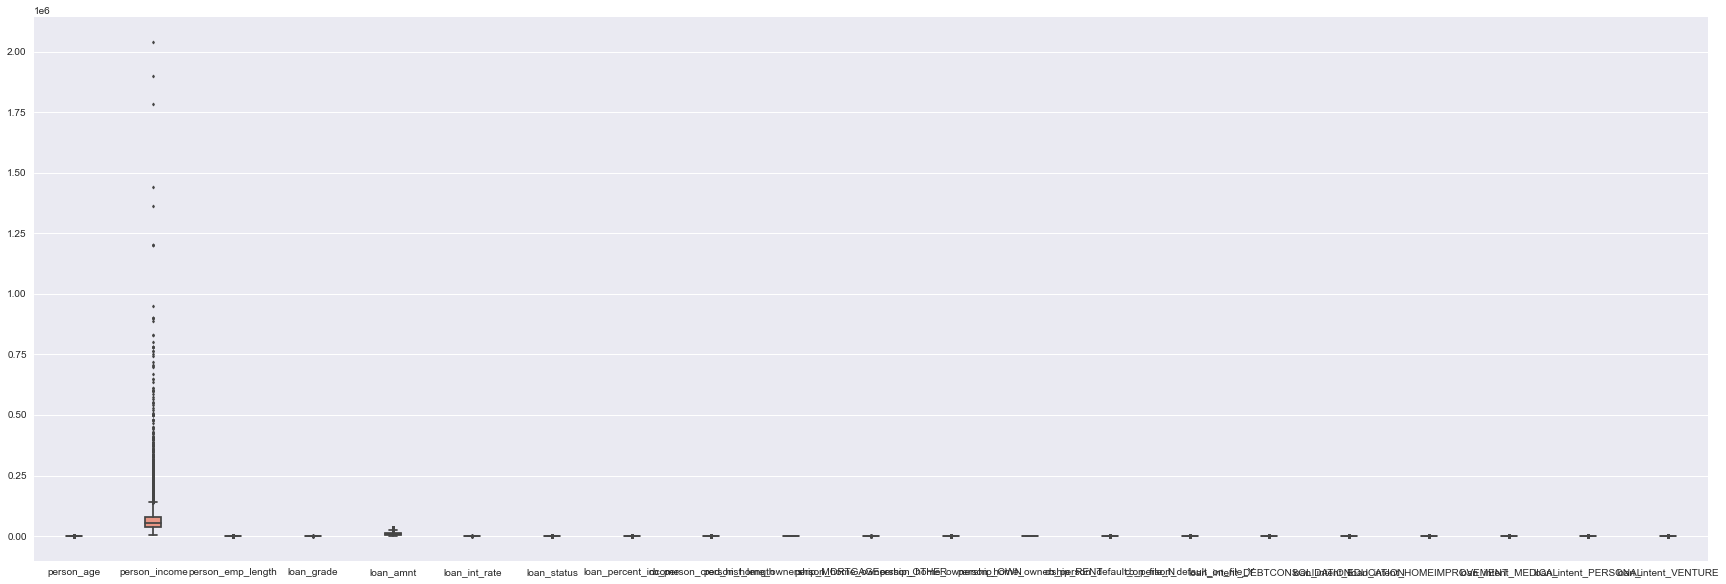

In [50]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=data,ax=ax,width= 0.2,fliersize=2)


# we see that person income has highest outliers
# Removing 7 percent of the data


In [51]:
q = data['person_income'].quantile(0.93)
data = data[data['person_income']<q]


<AxesSubplot:>

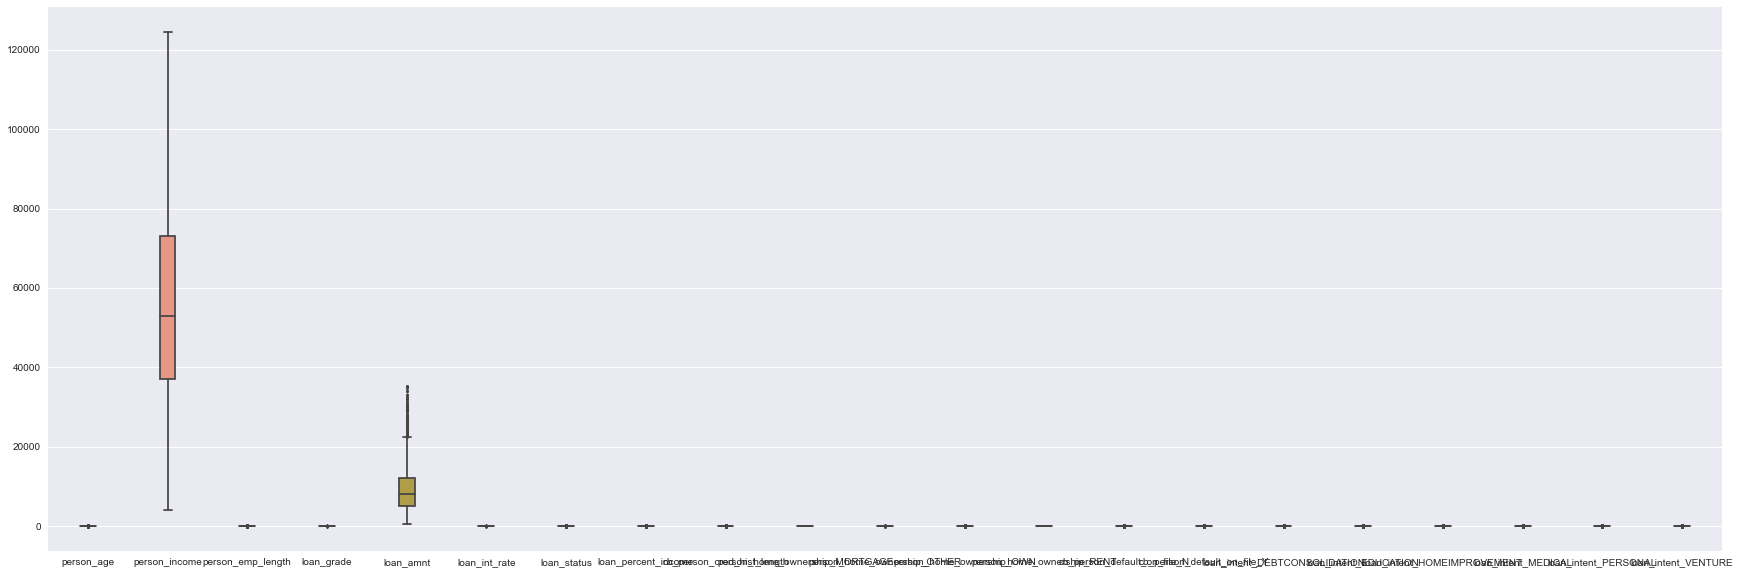

In [52]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=data,ax=ax,width= 0.2,fliersize=2)


# we also see that loan amount has a SLIGHT outliers
# Removing 4 percent of the data


In [53]:
q_loanAmount=data['loan_amnt'].quantile(0.96)
data=data[data['loan_amnt']<q_loanAmount]


<AxesSubplot:>

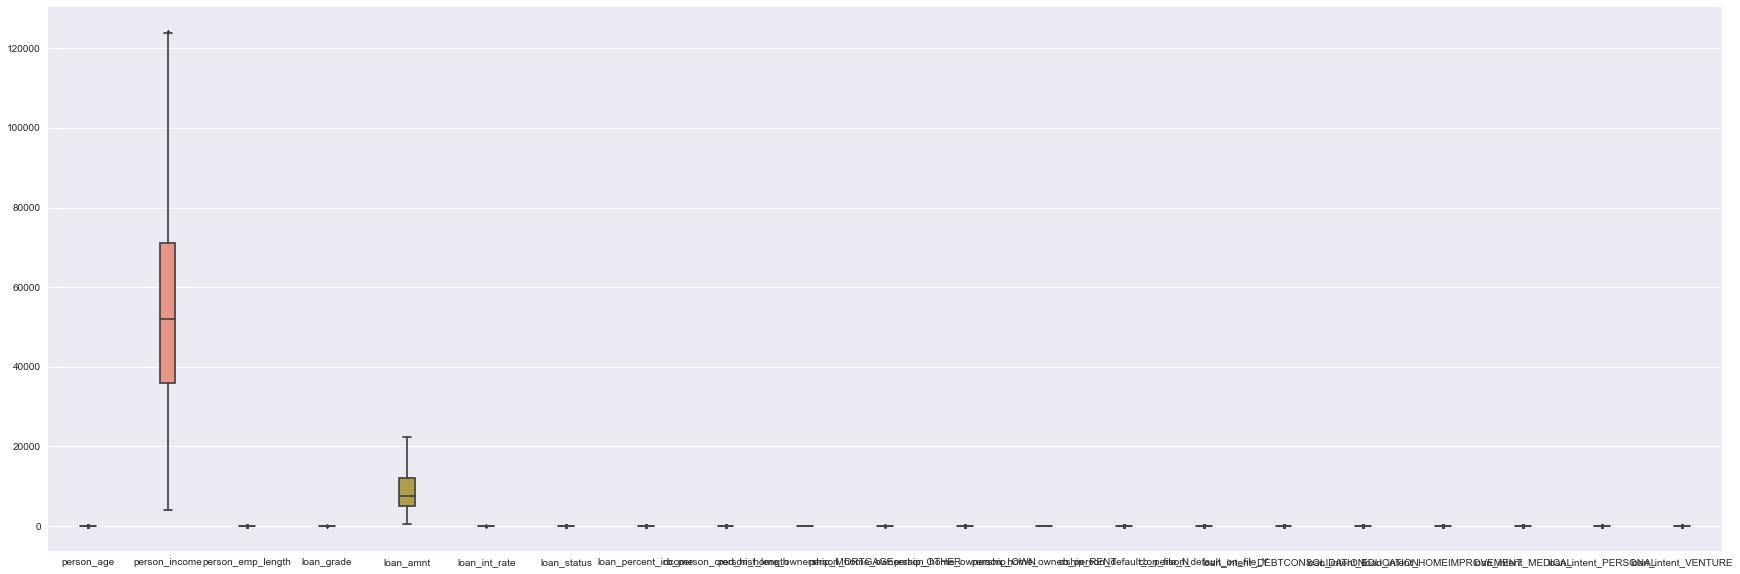

In [54]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=data,ax=ax,width= 0.2,fliersize=2)


# Feature engineering technique: checking the existence of  multicollinearity.
.

In [55]:
X = data.drop(columns = ['loan_status'])
y = data['loan_status']

In [56]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [57]:
X_scaled


array([[-1.06946885, -1.86504982,  0.09920036, ..., -0.48384886,
        -0.45139948, -0.4604697 ],
       [-0.41561105, -1.86504982, -0.93703957, ...,  2.0667611 ,
        -0.45139948, -0.4604697 ],
       [-1.06946885, -1.8529248 , -0.67797959, ..., -0.48384886,
        -0.45139948,  2.17169556],
       ...,
       [ 4.81525134, -0.11096327, -0.93703957, ..., -0.48384886,
         2.21533261, -0.4604697 ],
       [ 4.32485799,  2.59695836, -0.15985962, ..., -0.48384886,
         2.21533261, -0.4604697 ],
       [ 6.28643138, -0.55554742, -0.67797959, ...,  2.0667611 ,
        -0.45139948, -0.4604697 ]])

In [58]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
#let's check the values
vif

/Users/abhishekshastry/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif                        Features
0   4.408911                      person_age
1   3.763041                   person_income
2   1.107977               person_emp_length
3   5.161416                      loan_grade
4   5.261069                       loan_amnt
5   4.742383                   loan_int_rate
6   5.520778             loan_percent_income
7   4.358653      cb_person_cred_hist_length
8        inf  person_home_ownership_MORTGAGE
9        inf     person_home_ownership_OTHER
10       inf       person_home_ownership_OWN
11       inf      person_home_ownership_RENT
12       inf     cb_person_default_on_file_N
13       inf     cb_person_default_on_file_Y
14       inf   loan_intent_DEBTCONSOLIDATION
15       inf           loan_intent_EDUCATION
16       inf     loan_intent_HOMEIMPROVEMENT
17       inf             loan_intent_MEDICAL
18       inf            loan_intent_PERSONAL
19       inf             loan_intent_VENTURE

# Two of Vif values are just above five. None are above 10 and Not compeletely above five.So All these variables seems fine. 

# Using Feature engineering technique PCA 

In [113]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state= 355)

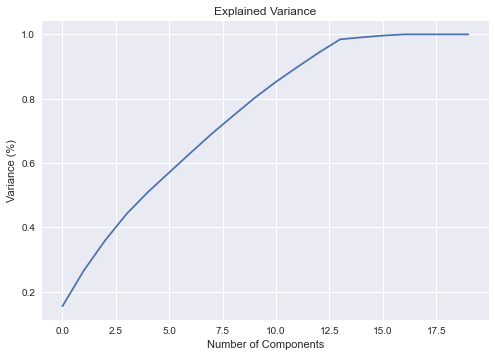

In [114]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

# We can see that around 95% of the variance is being explained by 13 components.So instead of giving all 21 columns as input in our algorithm let's use these 13 principal components instead.

In [115]:
pca = PCA(n_components=13)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13'])

In [116]:
principal_x

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0     -0.454804 -1.712790 -1.250241 -1.110833  2.997901  1.793926  0.650971   
1      0.582210 -1.065275 -0.361866  2.389174  0.428289 -1.345258  2.141810   
2     -1.191239 -2.159676 -0.728767  0.160433  4.301630 -0.972849 -0.780643   
3      0.947978 -1.065189 -0.848574 -0.464219  4.223882 -0.939900 -0.758341   
4     -0.694711 -1.862766 -0.396003  1.763651  3.071566  0.072816  0.259656   
...         ...       ...       ...       ...       ...       ...       ...   
28925  3.959928  3.191967  4.371633  1.732002 -0.435452  1.140823 -1.088375   
28926 -0.264490  1.104592  4.598270 -1.416100 -0.269870  2.870589  0.207433   
28927 -0.416861  4.318673  5.897415 -1.022778  0.219838  1.341762 -1.022955   
28928 -2.323387  4.382419  3.673736  0.997445 -0.680573  1.070251 -0.965126   
28929 -0.293190  2.416281  8.352207 -0.937308 -0.061325  0.305277  1.637516   

           PC-8      PC-9     PC-10     PC-11     PC-12     PC-13  
0     -0.232496 -1.450489  1.928187 -0.209582  1.356281  0.463845  
1      0.912144 -1.325523  1.156101 -0.160209 -2.081737  1.970280  
2     -0.554684 -0.936585  1.298318 -0.308180 -0.022912 -0.375672  
3     -0.588685 -0.688340  0.972878 -0.355115  1.376406  1.875269  
4      0.109332  1.062590  4.329075 -0.533893 -0.266728 -0.452913  
...         ...       ...       ...       ...       ...       ...  
28925  1.575042 -0.416544 -0.960300  0.041043 -0.316548 -0.816379  
28926 -1.295047 -0.622002 -0.762407  0.458480 -0.328404  0.692413  
28927  1.533790 -1.294285 -0.105750  0.343462 -1.333820  2.245814  
28928  1.546682 -0.176716 -1.278333  0.291631 -0.091744 -0.552024  
28929 -0.546942 -1.092517 -0.471071  0.440837 -0.921759  0.613181  

[28930 rows x 13 columns]

In [117]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.832584399124323

# Using PCA we conclude that our model accuracy has decreased

# Model Selection

In [112]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)


# Logistic regression for on cleaned, feature engineered data set

In [60]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [90]:
y_pred_LR=log_reg.predict(x_test)


In [91]:
accuracy_score=accuracy_score(y_test,y_pred_LR)
accuracy_score


0.8584266556062491

In [92]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_LR)
conf_mat


array([[5387,  287],
       [ 737,  822]])

In [93]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]


In [94]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision


0.949418399718012

In [66]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall


0.8796538210320052

In [67]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score


0.9132056280725547

In [99]:
# Area Under Curve
auc_LR = roc_auc_score(y_test, y_pred_LR)
auc_LR

0.7383397322515655

In [97]:
# ROC
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_LR)

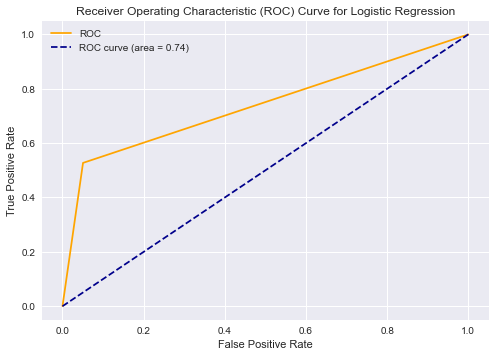

In [100]:
plt.plot(fpr_logistic, tpr_logistic, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

# We are able to get a accuracy of 85 percent.

# Ensemble Technique

# Bagging ensemble approach 

In [69]:
bag_knn = BaggingClassifier(LogisticRegression(),
                            n_estimators=10, max_samples=0.7,
                            bootstrap=True, random_state=3,oob_score=True) 

In [70]:
bag_knn.fit(x_train, y_train)
bag_knn.score(x_test, y_test)

/Users/abhishekshastry/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/abhishekshastry/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


0.85815014516798

In [71]:
pasting_knn = BaggingClassifier(LogisticRegression(),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3) 

In [72]:
pasting_knn.fit(x_train, y_train)
pasting_knn.score(x_test, y_test)

0.8582884003871146

# we see that by bagging and pasting is not making a much difference in the accuracy.This says that the model is not overfitted..


# Decision Tree modelling on cleaned and featured engineered data set

In [160]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [161]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['person_age',
 'person_income',
 'person_emp_length',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'cb_person_default_on_file_N',
 'cb_person_default_on_file_Y',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

In [162]:
clf.score(x_train,y_train)

1.0

In [163]:
py_pred = clf.predict(x_test)

In [164]:
accuracy_score(py_pred,y_test)

0.8345431501325038

In [165]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.8345431501325038

# we see that decisoon tree increased accuracy from 85 to 88 percent.

# Random forest classifier on cleaned and feature engineered dataset

In [130]:
rand_clf = RandomForestClassifier(random_state=6)

In [131]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [132]:
rand_clf.score(x_test,y_test)

0.8990667127549257

# Random forest classifier increased the accuracy of our model.

# Knn classifier on cleaned and featured engineered data set

In [133]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [134]:
y_pred = knn.predict(x_test)

In [135]:
knn.score(x_train,y_train)

0.9088440077033233

In [136]:
print("The accuracy score of KNN is : ", accuracy_score(y_test,y_pred))

The accuracy score of KNN is :  0.8808618504435995


# KNN has also increased the accuracy more than logistic regression

# Hyperparameter tunning

# let us now tune the hyperparameters

In [137]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,],
               'n_neighbors' : [3,5,7]
              
              }

In [138]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [139]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.4s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.4s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.4s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.4s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.4s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.4s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.4s
[CV 2/5] END algorithm=ball_tree, le

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25], 'n_neighbors': [3, 5, 7]},
             verbose=3)

In [141]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 7}

In [142]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =7)

In [143]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=7)

In [144]:
knn.score(x_train,y_train)

0.9029677546787813

In [145]:
knn.score(x_test,y_test)

0.8873142067058417

# By tuning the hyperparametres we are able to increase a very little percentage of the accuracy

# Gausian naive bayes classification model 

In [147]:
model = GaussianNB()

In [148]:
model.fit(x_train,y_train)

GaussianNB()

In [149]:
y_predNB = model.predict(x_test)

In [150]:
print(accuracy_score(y_test, y_predNB))

0.8275146906325613


In [151]:
# Area Under Curve
auc_NB = roc_auc_score(y_test, y_predNB)
auc_NB

0.6772259469920426

In [152]:
fpr, tpr, thresholds = roc_curve(y_test, y_predNB)

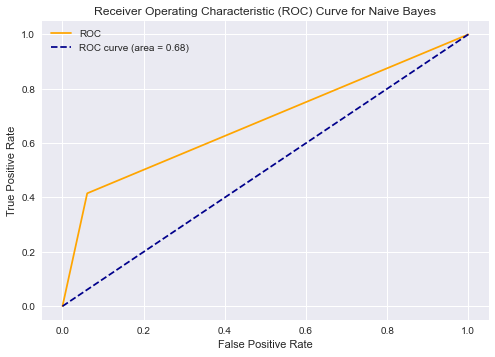

In [153]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_NB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

# we see that in naive bayes classfication the accuracy is quite low as campared to other models

# The best classification model stands out to be random forest with accuracy of 90 percent.